# Chat ou Chien !! une méthode d'apprentissage automatique.

Dans une entreprise de marketing, on veut faire une étude sur les clients qui fréquentent un grand magasin. L'idée est d'estimer le pourcentage de clients qui ont des chats et ceux qui ont des chiens, afin de prendre des décisions marketing ciblées. Vous proposez d'utiliser une caméra pour détecter et compter les deux animaux dans le magasin. La première étape du projet est de développer un modèle qui peut détecter le chat ou le chien. Ainsi, dans ce brief, en utilisant une base de données, vous allez entrainer un modèle d'apprentissage automatique avec un apprentissage supervisé.

# Veille technologique: Opencv python

- Préparation données imagerie pour méthode classique d'apprentissage automatique
- Entrainement et évaluation (similaire aux briefs précédents)

## Operations Simples

In [1]:

# use opencv to load and display the image
import os
import cv2
from skimage.io import imread, imsave, imshow
import numpy as np
import warnings

warnings.simplefilter(action = "ignore", category = Warning)
warnings.filterwarnings("ignore")


In [2]:

# Préparer les données
size = (150, 150)

image_directory = 'cats_dogs/PetImages/'
cat_directory = image_directory + "Cat/"
dog_directory = image_directory + "Dog/"

images = []  # liste pour les images
labels = []  # liste pour les labels (0 ou 1) pour deux classes

# Lire les noms des images dans chaque sous-dossier
cat_images = os.listdir(cat_directory)
dog_images = os.listdir(dog_directory)

nb_corrupt = 0

# Boucle pour les images de chats
for img_name in cat_images:
    img_path = cat_directory + img_name
    try:
        img = cv2.imread(img_path)
        if img is None:
            nb_corrupt += 1
            continue
        img_resized = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
        images.append(img_resized)
        labels.append(0)
        #cv2.imwrite(image_directory + 'cat/' + img_name, img_resized)
    except Exception as e:
        nb_corrupt += 1
        continue

# Boucle pour les images de chiens
for img_name in dog_images:
    img_path = dog_directory + img_name
    try:
        img = cv2.imread(img_path)
        if img is None:
            nb_corrupt += 1
            continue
        img_resized = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
        images.append(img_resized)
        labels.append(1)
        #cv2.imwrite(image_directory + 'dog/' + img_name, img_resized)
    except Exception as e:
        nb_corrupt += 1
        continue

print()
print('    Nb img corrupted: ' +  str(nb_corrupt))
print('    Nb images: ' + str(len(images)))
print('    Nb labels: ' + str(len(labels)))
print()

# transformer les listes en numpy 
np_images = np.array(images)
np_labels = np.array(labels)

# save data as ".npy" file
np.save('images.npy', np_images)
np.save('labels.npy', np_labels)

# show shape
print()
print('    > Shape of images array: ', np_images.shape)
print('    > Shape of labels array: ', np_labels.shape)
print()


Corrupt JPEG data: 239 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 65 extraneous bytes before marker 0xd9



    Nb img corrupted: 56
    Nb images: 24946
    Nb labels: 24946


    > Shape of images array:  (24946, 150, 150, 3)
    > Shape of labels array:  (24946,)



In [3]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Redimensionner les données images pour le modèle d'apprentissage automatique
images_reshaped = np_images.reshape(np_images.shape[0], -1)

# Split les données en ensembles d'entraînement et de test avec stratification
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size = 0.2, stratify = labels, random_state = 42)

# initialiser le classifier
model = RandomForestClassifier(random_state = 42, n_jobs = -1)

# entrainer le classifier
model.fit(X_train, y_train)

print()
print('ok fit')
print()



ok fit



In [4]:

from sklearn.metrics import classification_report

# predire
y_pred = model.predict(X_test)

# evaluer avec classification_report
print()
print(classification_report(y_test, y_pred))
print()



              precision    recall  f1-score   support

           0       0.65      0.70      0.67      2496
           1       0.67      0.62      0.64      2494

    accuracy                           0.66      4990
   macro avg       0.66      0.66      0.66      4990
weighted avg       0.66      0.66      0.66      4990




### Essayer de normaliser chaque image entre 0 et 255 et rentrainer le modèle. Y a-t-il une amélioration ?

In [ ]:

np_images = np.array(images, dtype = np.float32)
np_images_normalized = np_images / 255.0
images_reshaped = np_images.reshape(np_images.shape[0], -1)

X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size = 0.2, stratify = labels, random_state = 42)

model = RandomForestClassifier(random_state = 42, n_jobs = -1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print()
print(classification_report(y_test, y_pred))
print()



## Display histogram


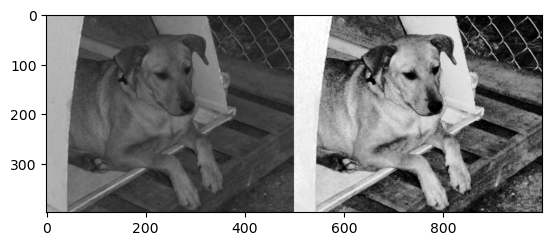

In [3]:

import matplotlib.pyplot as plt

img = cv2.imread(dog_directory + '100.jpg', 0)
equ = cv2.equalizeHist(img)
res = np.hstack((img, equ)) #stacking images side-by-side

plt.imshow(res, cmap = 'gray')


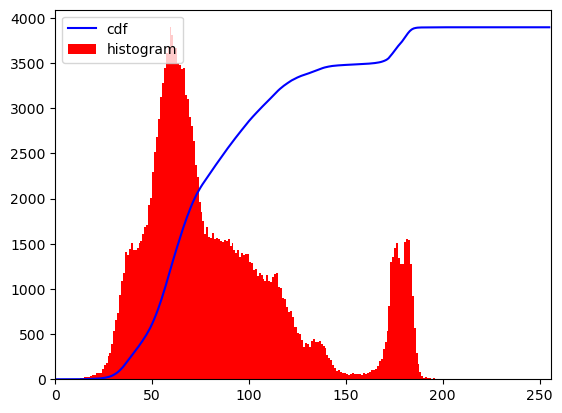

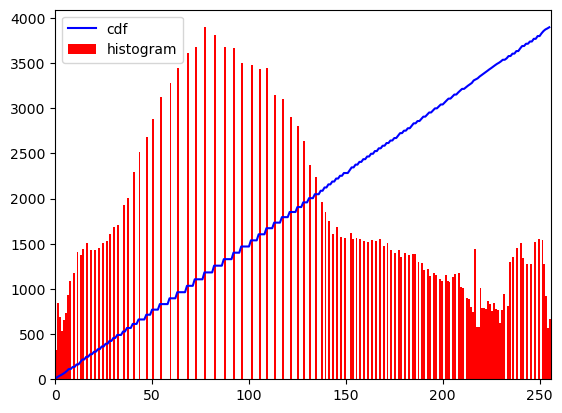

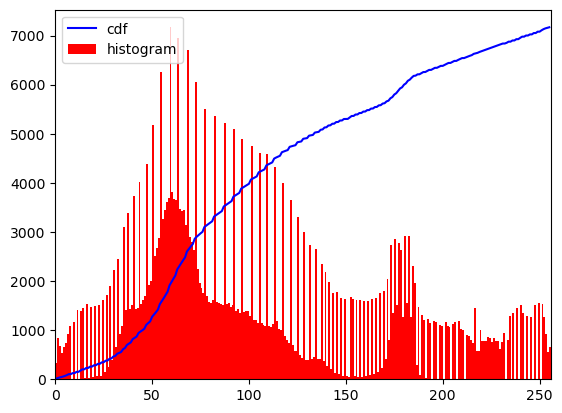

In [10]:

def get_histogram(img):
    hist, bins = np.histogram(img.flatten(), 256, [0,256])
     
    cdf = hist.cumsum()
    cdf_normalized = cdf * hist.max()/ cdf.max()
     
    plt.plot(cdf_normalized, color = 'b')
    plt.hist(img.flatten(), 256, [0,256], color = 'r')
    plt.xlim([0, 256])
    plt.legend(('cdf', 'histogram'), loc = 'upper left')
    plt.show()

get_histogram(img)
get_histogram(equ)
get_histogram(res)


# Neural network MLP

Entrainer un modèle MLP pour detecter la class Dog ou Cat.

In [6]:
# use PCA to reduce dimensions
# check this tuto: https://www.askpython.com/python/examples/principal-component-analysis-for-image-data

from tensorflow.keras.layers import Input, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# creer un reseau de neurone avec une couche d'entrée de taille (150*150*3), deux couches caché de taille 128 et une activation "relu". 
# Dernière couche de taille 1 avec une activation sigmoid. Choisir la bonne "loss function" et "optimizer"

input_shape = (150 * 150 * 3,)
inputs = Input(shape = input_shape)

x = Dense(128, activation='relu')(inputs)
x = Dense(128, activation='relu')(x)

outputs = Dense(1, activation='sigmoid')(x)

model = Model(inputs, outputs)
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()


2024-04-10 20:23:29.749932: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 20:23:30.861073: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 67500)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,640,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,656,769 (33.02 MB)

 Trainable params: 8,656,769 (33.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

# entrainer le modèle avec validation_split = 2, epochs = 20, et un batch_size = 128
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

images_reshaped = np_images.reshape(np_images.shape[0], -1)
X_train, X_test, y_train, y_test = train_test_split(images_reshaped, labels, test_size = 0.2, stratify = labels, random_state = 42)

X_train = np.array(X_train)
y_train = np.array(y_train)

# Définition du callback EarlyStopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 3)

# Entraînement du modèle
history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    epochs = 20,
    batch_size = 128,
    callbacks=[early_stopping]
)

# Afficher l'historique d'entraînement
print()
print(history.history.keys())
print()

# Visualiser les courbes de perte
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Courbes de perte')
plt.ylabel('Pertes')
plt.xlabel('Époques')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

# Visualiser les courbes d'exactitude
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Courbes d\'exactitude')
plt.ylabel('Exactitude')
plt.xlabel('Époques')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()


In [ ]:

# evaluate MLP
# evaluate classifier
from sklearn.metrics import classification_report

# predire
y_pred = model.predict(X_test)

# evaluer avec classification_report
y_pred = [1 if y >= 0.5 else 0 for y in y_pred]

print()
print(classification_report(y_test, y_pred))
print()
